In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("product_sales.csv")

In [15]:
# Drop random columns
df = df.drop(columns=["Unnamed: 107", "94"])
# Melt data and remove strings for week names
df = df.melt(id_vars=["Scode", "Pcode", "Price"], var_name="Week", value_name="Quantity Sold")
df["Week"] = df["Week"].str.extract('(\d+)').astype(int)


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/hh/rn_fsj015zz6cmlmssx4w0y00000gn/T/ipykernel_23393/4238326872.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["Week"] = df["Week"].str.extract('(\d+)').astype(int)


In [26]:
graphing_df = df[df["Scode"] == "Store1"]
graphing_df = df[df["Pcode"].isin(["SKU1","SKU2","SKU3"])].reset_index(drop=True)
graphing_df.drop(columns=["Scode", "Price"], inplace=True)

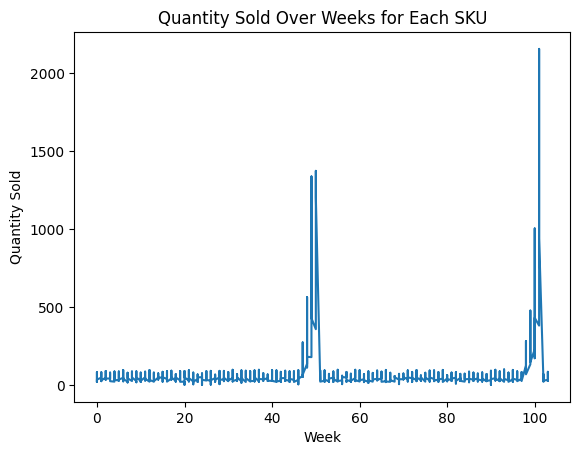

In [32]:
skus = df["Pcode"].unique()
plt.figure()
for sku in skus[:1]:
    sku_data = df[df["Pcode"] == sku]
    plt.plot(sku_data["Week"], sku_data["Quantity Sold"])
plt.title("Quantity Sold Over Weeks for Each SKU")
plt.xlabel("Week")
plt.ylabel("Quantity Sold")
plt.show()
